<h1><font color="#113D68" size=5>TINTOlib: Converting Tidy Data into Image for Classification with 2-Dimensional Convolutional Neural Networks</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Borja Reinoso Hidalgo</font><br>
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section12)
* [2. Libraries](#section2)
* [3. Data processing](#section3)
    * [3.1. Create images](#section31)
    * [3.2. Read Images](#section32)
    * [3.3. Mix images and tidy data](#section33)
* [4. Pre-modelling phase](#section4)
* [5. Modelling hybrid network](#section5)
    * [5.1. Hybrid network](#section51)
    * [5.2. Compile and fit](#section52)
* [6. Results](#section6)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTOlib and pass them to a very simple pretrained Convolutional Neural Network (CNN). The images must already be created by the TINTO software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib in [GitHub](https://github.com/oeg-upm/TINTOlib)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTOlib offers the opportunity to convert tidy data into images through several techniques: TINTO, IGTD, REFINED, SuperTML, BarGraph, DistanceMatrix and Combination.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data could be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Dataframe***: The input data could be in **[Pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTOlib does not accept data in string or any other non-numeric format.
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

The first thing we need to do is to declare the libraries

In [2]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf
import seaborn as sns
from PIL import Image


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax
from tensorflow.keras import layers, models, Model
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, concatenate

from imblearn.over_sampling import RandomOverSampler

#Models of TINTOlib
from TINTOlib.tinto import TINTO
from TINTOlib.supertml import SuperTML
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.barGraph import BarGraph
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.combination import Combination
import TINTOlib.utils

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

The first thing to do is to read all the images created by TINTO. TINTO creates a folder which contains subfolders corresponding to each target that has the problem. Each image corresponds to a sample of the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Create images with TINTOlib</font>

In [27]:
#Select the model and the parameters
problem_type = "supervised"
image_model = Combination(problem=problem_type)

#Define the dataset path and the folder where the images will be saved
dataset_path = "iris.csv "
images_folder = "hybridclassification"

In [ ]:
#Read CSV
df = pd.read_csv(dataset_path)
df.head(2)

In [ ]:
#Generate the images
image_model.generateImages(df, images_folder)
img_paths = os.path.join(images_folder,problem_type+".csv")

print(img_paths)

<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Read Images</font>

In [ ]:
imgs = pd.read_csv(img_paths)

#imgs["images"]= images_folder + "\\" + imgs["images"]
imgs["images"]= images_folder + "/" + imgs["images"]

<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Mix images and tidy data</font>

In [ ]:
# Select all the attributes to normalize
columns_to_normalize = df.columns[:-1]

# Normalize between 0 and 1
df_normalized = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

# Combine the attributes and the label
df_normalized = pd.concat([df_normalized, df[df.columns[-1]]], axis=1)

df_normalized.head(2)

Combine the images and tidy data in the same dataframe, split attributes and objective value

In [ ]:
combined_dataset = pd.concat([imgs,df_normalized],axis=1)
#MEDV is the objective value in Boston dataset
df_x = combined_dataset.drop("class",axis=1)
df_y = combined_dataset["class"]

print(df_y)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

Split train/validation/test instances

In [28]:
import cv2
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state = 123,stratify=df_y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = 123,stratify=y_val)

X_train_num = X_train.drop("images",axis=1)
X_val_num = X_val.drop("images",axis=1)
X_test_num = X_test.drop("images",axis=1)

"""X_train_img = np.array([cv2.imread(img) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img) for img in X_test["images"]])"""

X_train_img = np.array([cv2.resize(cv2.imread(img),(size,size)) for img in X_train["images"]])
X_val_img = np.array([cv2.resize(cv2.imread(img),(size,size)) for img in X_val["images"]])
X_test_img = np.array([cv2.resize(cv2.imread(img),(size,size)) for img in X_test["images"]])

n_class = df['Species'].value_counts().count()
attributes = len(X_train_num.columns)

print("Image shape",X_train_img[0].shape)
print("Attributes",attributes)
print("Classes",n_class)
size=X_train_img[0].shape[0]
print(size)

Image shape (40, 40, 3)
Attributes 4
Classes 3
40


In [29]:
#ONE HOT ENCODING FOR MULTICLASS PROBLEMS
from tensorflow.keras.utils import to_categorical

# y-1 because target is between [1,28] and not [0,27]
y_train_oh =  to_categorical(y_train-1,n_class)
y_val_oh = to_categorical(y_val-1,n_class)
y_test_oh = to_categorical(y_test-1,n_class)

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modeling hybrid network</font>

<a id="section51"></a>
# <font color="#004D7F" size=5> 5.1. Hybrid network</font>

In this example, 2 branch networks is created
- 1º branch: FFNN
- 2º branch: CNN

In [3]:
dropout = 0.5

FFNN branch

In [ ]:
filters_ffnn = [128,64,32]

ff_model = Sequential()
ff_model.add(Input(shape=(attributes,)))

for layer in filters_ffnn:
    ff_model.add(Dense(layer, activation="relu"))
    ff_model.add(BatchNormalization())
    ff_model.add(Dropout(dropout))

CNN branch

In [32]:
filters_cnn =  [16,32,64,128]

cnn_model = Sequential()
cnn_model.add(Input(shape=(size,size, 3)))

for layer in filters_cnn:
    cnn_model.add(Conv2D(layer, (3, 3), padding="same"))
    cnn_model.add(Activation("relu"))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten the volume, then FC => RELU => BN => DROPOUT
cnn_model.add(Flatten())
cnn_model.add(Dense(128))
cnn_model.add(Activation("relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(dropout))
cnn_model.add(Dense(64))
cnn_model.add(Activation("relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(dropout))
# apply another FC layer, this one to match the number of nodes
# coming out of the MLP
cnn_model.add(Dense(32))
cnn_model.add(Activation("relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(dropout))


Combine branches

In [33]:
combinedInput = concatenate([ff_model.output, cnn_model.output])
x = Dense(64, activation="relu")(combinedInput)
x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(n_class, activation="softmax")(x)

model = Model(inputs=[ff_model.input, cnn_model.input], outputs=x)

Define metrics and some hyperparameters

In [34]:
METRICS = [
    #tf.keras.metrics.TruePositives(name = 'tp'),
    #tf.keras.metrics.FalsePositives(name = 'fp'),
    #tf.keras.metrics.TrueNegatives(name = 'tn'),
    #tf.keras.metrics.FalseNegatives(name = 'fn'), 
    tf.keras.metrics.BinaryAccuracy(name ='accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall'),
    tf.keras.metrics.AUC(name = 'auc'),
]

In [35]:
#HYPERPARAMETERS
opt = Adam(learning_rate=1e-3)

<a id="section52"></a>
# <font color="#004D7F" size=5> 5.2. Compile and fit</font>

In [ ]:
model.compile(
    loss="categorical_crossentropy", 
    optimizer=opt,
    metrics = METRICS
)
epochs = 500

In [ ]:
model_history=model.fit(
    x=[X_train_num, X_train_img], y=y_train_oh,
    validation_data=([X_val_num, X_val_img], y_val_oh),
    epochs=epochs , 
    batch_size=8,
)

In [ ]:
print(model_history.history.keys())

<a id="section6"></a>
# <font color="#004D7F" size=6> 6. Results</font>

In [ ]:
#print(model_history.history['loss'])
plt.plot(model_history.history['loss'], color = 'red', label = 'loss')
plt.plot(model_history.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.ylim(0,1)
plt.show()

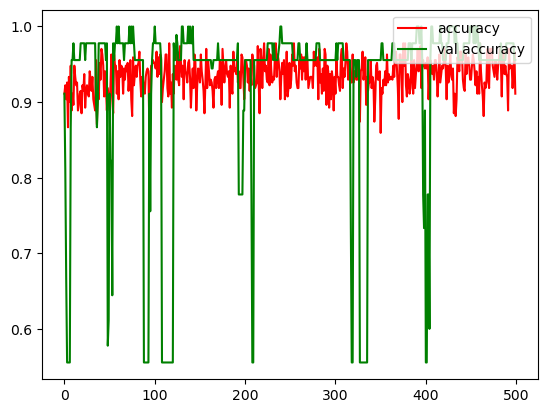

In [183]:
plt.plot(model_history.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], color = 'green', label = 'val accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [177]:
score_test= model.evaluate([X_test_num, X_test_img], y_test_oh)

1/1 [==============================] - 1s 590ms/step - loss: 0.1129 - accuracy: 0.9889 - precision: 1.0000 - recall: 0.9667 - auc: 0.9994


In [95]:
prediction = model.predict([X_test_num,X_test_img],)
real_values= y_test.values-1
predicted_classes = np.argmax(prediction, axis = 1)

result = [list(t) for t in zip(predicted_classes, real_values)]
#print(np.round(prediction))


10/10 [==============================] - 1s 16ms/step


In [100]:
test_accuracy = score_test[1]
test_auc = score_test[4]
test_precision = score_test[2]
test_recall = score_test[3]

print("Test accuracy:",test_accuracy)
print("Test AUC:",test_auc)
print("Test precision:",test_precision)
print("Test recall:",test_recall)

Test accuracy: 0.7478070259094238
Test AUC: 0.8234261274337769
Test precision: 0.64682537317276
Test recall: 0.5361841917037964


In [129]:
train_accuracy = model_history.history["accuracy"][-1]
train_auc = model_history.history["auc"][-1]
train_precision = model_history.history["precision"][-1]
train_recall = model_history.history["recall"][-1]
train_loss = model_history.history["loss"][-1]

print("Train accuracy:",train_accuracy)
print("Train AUC:",train_auc)
print("Train precision:",train_precision)
print("Train recall:",train_recall)
print("Train loss:",train_loss)

Train accuracy: 0.9642219543457031
Train AUC: 0.8031144738197327
Train precision: 0.2857142984867096
Train recall: 0.0011904762359336019
Train loss: 2.751965284347534


In [130]:
validation_accuracy = model_history.history["val_accuracy"][-1]
validation_auc = model_history.history["val_auc"][-1]
validation_precision = model_history.history["val_precision"][-1]
validation_recall = model_history.history["val_recall"][-1]
validation_loss = model_history.history["val_loss"][-1]

print("Validation accuracy:",validation_accuracy)
print("Validation AUC:",validation_auc)
print("Validation precision:",validation_precision)
print("Validation recall:",validation_recall)
print("Validation loss:",validation_loss)

Validation accuracy: 0.9642857313156128
Validation AUC: 0.8785466551780701
Validation precision: 0.0
Validation recall: 0.0
Validation loss: 2.4721860885620117


<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>